In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.
    
    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # Lost function by MSE 
    w = np.transpose(w); 
    N = len(y)
    losses = (((y - np.dot(tx,w))**2).mean(axis = 0)) / 2
    return losses

In [5]:
w = [1, 2]
compute_loss (y, tx, w) 

2694.4833658870843

# 2 Grid Search

Fill in the function `grid_search()` below:

In [6]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    
    for i in range(0, len(w0)):
        for j in range(0, len(w1)):
            w = [w0[i], w1[j]]; 
            cost = compute_loss(y, tx, w)
            losses[i, j] = cost;
            
    return losses
    
    # ***************************************************
    raise NotImplementedError

Let us play with the grid search demo now!

Grid Search: loss*=15.55870336860953, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.835 seconds


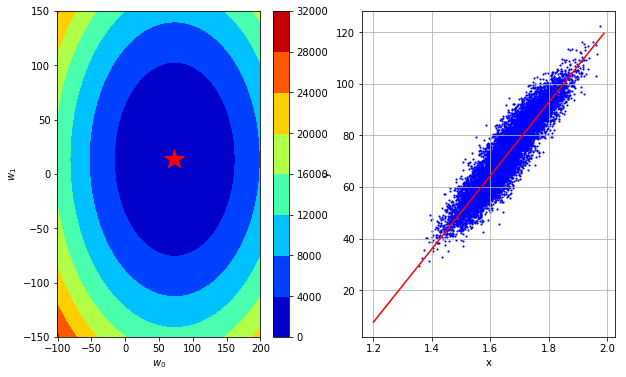

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    
    w = np.transpose(w)
    N = len(y)
    
    # MSE 
    gradient = -((1/N)*(np.dot(np.transpose(tx), y - np.dot(tx,w))))
    
    return gradient

In [9]:
#test 
from numpy import linalg as LA
w1 = [100, 20]
w2 = [50, 10]

print (compute_gradient(y, tx, w1))
print (compute_gradient(y, tx, w2))

print(LA.norm (compute_gradient(y, tx, w1)))
print(LA.norm (compute_gradient(y, tx, w2)))



[ 26.706078     6.52028757]
[-23.293922    -3.47971243]
27.4905211293
23.5523926782


Please fill in the functions `gradient_descent` below:

In [10]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # compute gradient and loss
        
        gradient = compute_gradient (y, tx, w)
        loss = compute_loss(y, tx, w)

        # update w by gradient
        
        w = w - gamma*gradient #computes the new w(t+1)
        
        # ***************************************************
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [11]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.8

# Initialization
w_initial = np.array([100, 10])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=378.0473881987588, w0=78.63513760168416, w1=12.783769947991267
Gradient Descent(1/49): loss=29.89234788202662, w0=74.36216512202097, w1=13.340523937589497
Gradient Descent(2/49): loss=15.96614626935727, w0=73.50757062608835, w1=13.45187473550914
Gradient Descent(3/49): loss=15.409098204850515, w0=73.33665172690182, w1=13.474144895093067
Gradient Descent(4/49): loss=15.386816282270244, w0=73.30246794706451, w1=13.478598927009852
Gradient Descent(5/49): loss=15.385925005367032, w0=73.29563119109706, w1=13.479489733393208
Gradient Descent(6/49): loss=15.385889354290907, w0=73.29426383990356, w1=13.47966789466988
Gradient Descent(7/49): loss=15.38588792824786, w0=73.29399036966487, w1=13.479703526925215
Gradient Descent(8/49): loss=15.385887871206139, w0=73.29393567561712, w1=13.479710653376282
Gradient Descent(9/49): loss=15.385887868924469, w0=73.29392473680758, w1=13.479712078666495
Gradient Descent(10/49): loss=15.385887868833205, w0=73.29392254904566, w1=1

<function __main__.plot_figure>

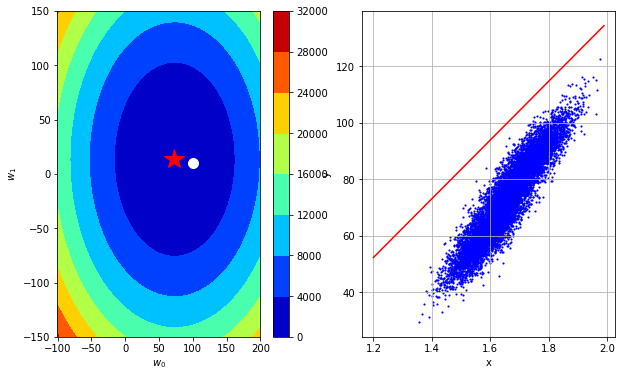

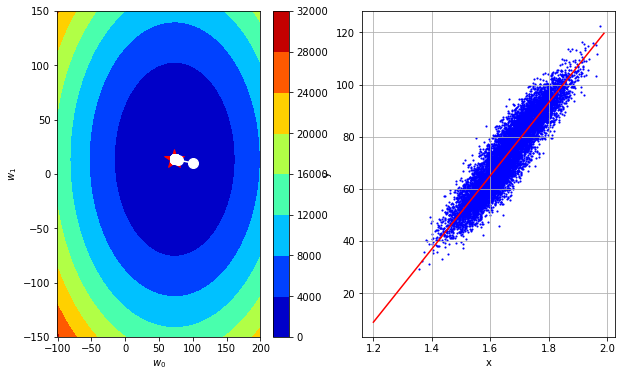

In [153]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [12]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # implement stochastic gradient computation.It's same as the gradient descent.
    return compute_gradient(y, tx, w)
    
def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # implement stochastic gradient descent.
    
    ws = [initial_w]
    losses = []
    w = initial_w
    g = 0
    for n_iter in range(max_iters):
        num_batches = 5
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches):
            g = g + compute_stoch_gradient(minibatch_y, minibatch_tx, w)
        g = g / num_batches #where g is the gradient 
        
        loss = compute_loss(y, tx, w)

        # update w by gradient
        w = w - gamma*g #computes the new w(t+1)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [13]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 1.5
batch_size = 50

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591674, w0=109.62169685347195, w1=15.480528504880553
Gradient Descent(1/49): loss=677.2411331673948, w0=76.88366693548323, w1=19.733581356614145
Gradient Descent(2/49): loss=41.384460456620175, w0=64.661956949373, w1=9.993809007959491
Gradient Descent(3/49): loss=58.717059555912435, w0=75.3694239828934, w1=13.621511071344905
Gradient Descent(4/49): loss=17.54979553159347, w0=74.57283545902486, w1=14.291324770418951
Gradient Descent(5/49): loss=16.5330549754855, w0=72.87492957141262, w1=12.55560836527765
Gradient Descent(6/49): loss=15.900649363146819, w0=72.38214520196037, w1=13.61282566266846
Gradient Descent(7/49): loss=15.810415901162179, w0=73.90083528347985, w1=14.345038932123185
Gradient Descent(8/49): loss=15.944454707705095, w0=73.19697204668537, w1=13.240444552386432
Gradient Descent(9/49): loss=15.419212075579923, w0=73.74591781502758, w1=13.677921272755352
Gradient Descent(10/49): loss=15.507681347963423, w0=72.66100074550536, w1=12.7

<function __main__.plot_figure>

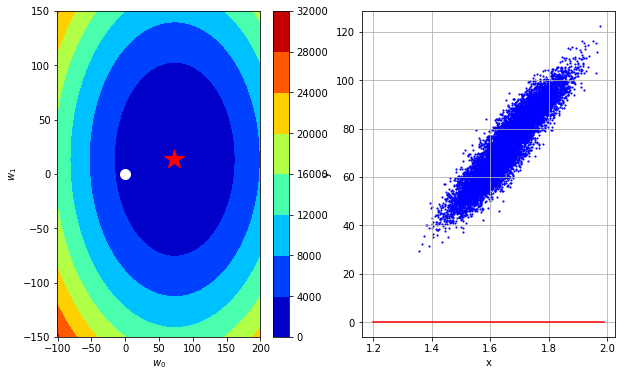

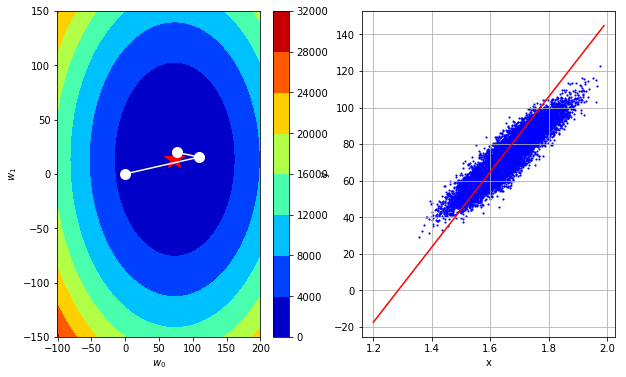

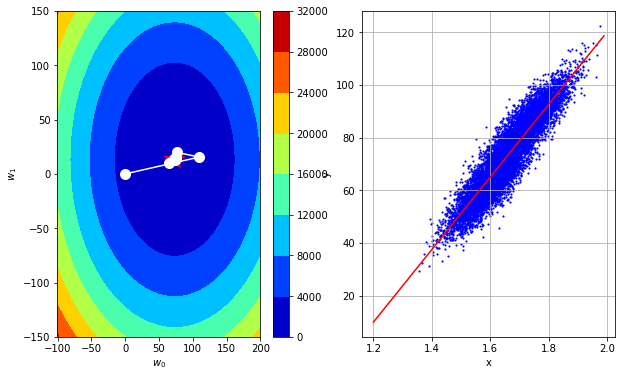

In [14]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [15]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [16]:
def compute_subgradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    #compute gradient and loss
    
    w = np.transpose(w)
    N = len(y)
    
    # MAE gradient: (demonstration is in notability ex6 - série 02)
    gradient = -((1/N)*(np.dot(np.transpose(tx),np.sign(y - np.dot(tx,w)))))
    
    return gradient 

In [17]:
def compute_loss(y, tx, w):
    """Calculate the loss.
    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    #Lost function by MAE 
    
    w = np.transpose(w); 
    N = len(y)
    losses = (np.abs((y - np.dot(tx,w)))).mean(axis = 0)
    return losses

In [18]:
w = [1, 2]
compute_loss (y, tx, w)

72.632272459731141

In [19]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    
    for i in range(0, len(w0)):
        for j in range(0, len(w1)):
            w = [w0[i], w1[j]]; 
            cost = compute_loss(y, tx, w)
            losses[i, j] = cost;
            
    return losses
    
    # ***************************************************
    raise NotImplementedError

Grid Search: loss*=4.3285065304566475, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.388 seconds


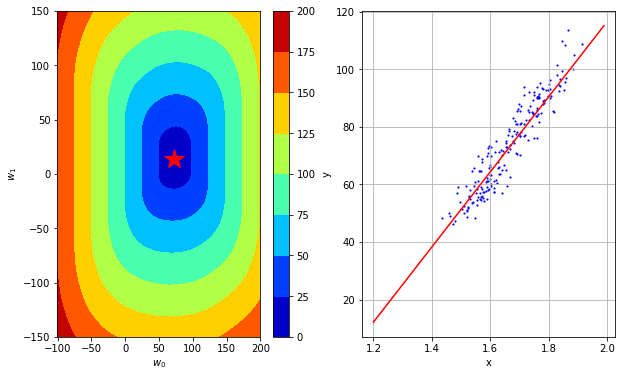

In [20]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

In [21]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.8


# Initialization
w_initial = np.array([100, 10])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=26.367727540268874, w0=78.90581796778488, w1=13.580563901149624
Gradient Descent(1/49): loss=6.237506685297101, w0=74.68698156134187, w1=14.296676681379589
Gradient Descent(2/49): loss=4.348024761973412, w0=73.84321428005326, w1=14.439899237425589
Gradient Descent(3/49): loss=4.235767106014124, w0=73.67446082379554, w1=14.468543748634792
Gradient Descent(4/49): loss=4.221821790490535, w0=73.640710132544, w1=14.474272650876632
Gradient Descent(5/49): loss=4.219978937337403, w0=73.63395999429369, w1=14.475418431325
Gradient Descent(6/49): loss=4.219610366706775, w0=73.63260996664363, w1=14.475647587414674
Gradient Descent(7/49): loss=4.21953665258065, w0=73.63233996111362, w1=14.47569341863261
Gradient Descent(8/49): loss=4.219521909755425, w0=73.63228596000762, w1=14.475702584876196
Gradient Descent(9/49): loss=4.219518961190379, w0=73.63227515978642, w1=14.475704418124913
Gradient Descent(10/49): loss=4.2195183714773705, w0=73.63227299974217, w1=14.47570478

<function __main__.plot_figure>

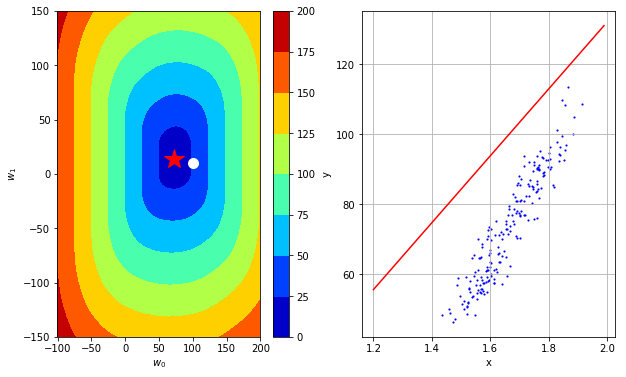

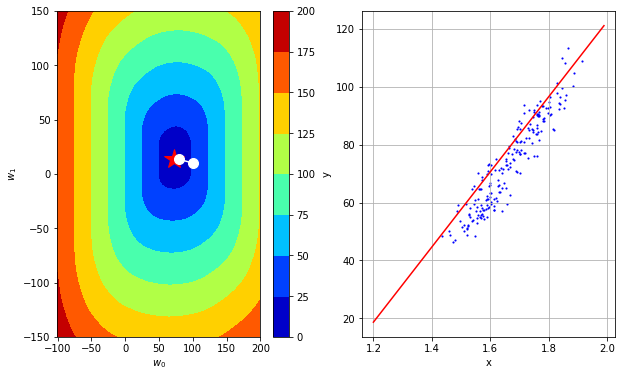

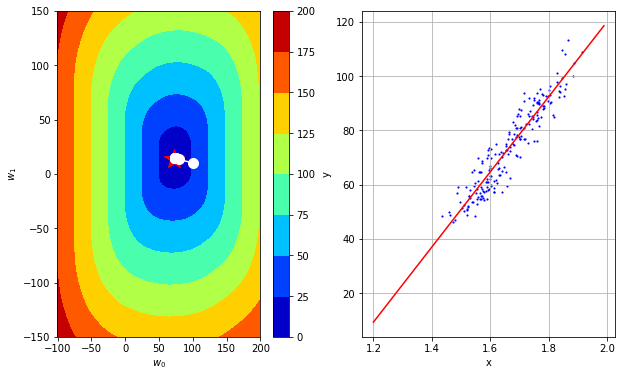

In [22]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

In [23]:
def compute_stoch_subgradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # implement stochastic gradient computation.It's same as the gradient descent.
    return compute_subgradient(y, tx, w)
    
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # implement stochastic gradient descent.
    
    ws = [initial_w]
    losses = []
    w = initial_w
    g = 0
    for n_iter in range(max_iters):
        num_batches = 5
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches):
            g = g + compute_stoch_subgradient(minibatch_y, minibatch_tx, w)
        g = g / num_batches #where g is the gradient 
        
        loss = compute_loss(y, tx, w)

        # TODO: update w by gradient
        w = w - gamma*g #computes the new w(t+1)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [24]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 1.7
batch_size = 25

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=73.63227245973114, w0=124.46430432317348, w1=21.668819960629875
Gradient Descent(1/49): loss=50.83203186344238, w0=62.91991492706549, w1=13.461201640227982
Gradient Descent(2/49): loss=10.772824325794648, w0=69.10615870293303, w1=11.752784358731914
Gradient Descent(3/49): loss=6.05175373643025, w0=77.61121423607014, w1=16.1386351717437
Gradient Descent(4/49): loss=5.651832232831523, w0=72.78396568692547, w1=14.215974722622706
Gradient Descent(5/49): loss=4.250689748221824, w0=74.30422446119272, w1=14.709581028105362
Gradient Descent(6/49): loss=4.2839560062726525, w0=73.05056585297714, w1=14.19338296524697
Gradient Descent(7/49): loss=4.234473914390271, w0=73.63773582324126, w1=15.393458579442644
Gradient Descent(8/49): loss=4.26683507244337, w0=74.40480278047008, w1=13.621259547557045
Gradient Descent(9/49): loss=4.362457167864057, w0=72.846466008884, w1=14.542660015015793
Gradient Descent(10/49): loss=4.226250675152506, w0=74.89362676519063, w1=15.1950145

<function __main__.plot_figure>

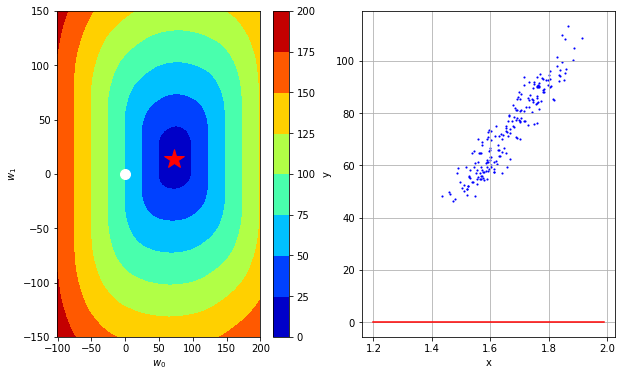

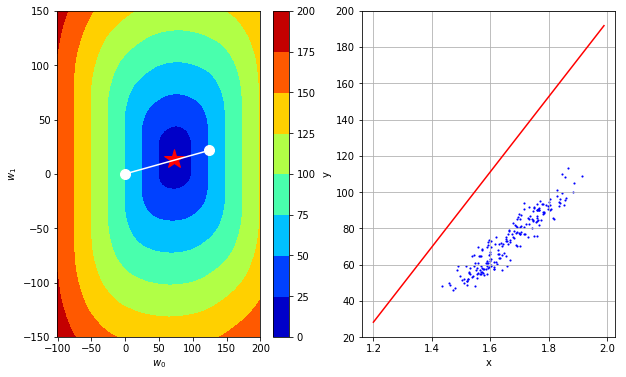

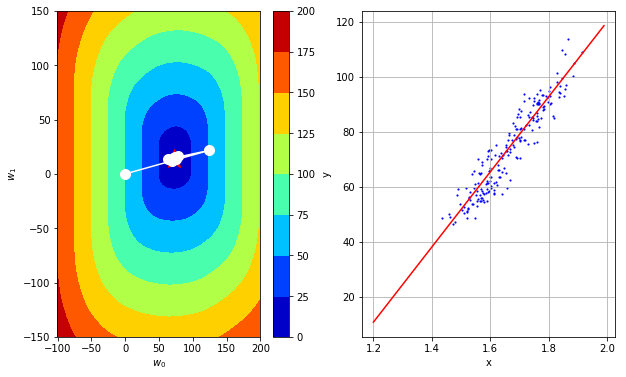

In [25]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [6]:
tx

NameError: name 'tx' is not defined